In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb


from time import time
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

### Generating the Dummy Dataset And Splitting into Training and Testing datasets

We are generating a dummy dataset with 25000 observations and 10 variables of which 5 are informative and 5 are redundant. We have also defined the weights parameter as None as we want the classes in the dependent variable to be balanced. We will use this dataset to tune hyperparameters using various methods.

In [7]:
# Generating Synthetic Dataset
X, y = make_classification(n_samples=25000, 
                           n_classes=2,
                           n_features=10, 
                           n_informative=5, 
                           n_redundant=5,
                           random_state=42,
                           weights=None)

In [8]:
# Splitting the data into train, test datasets
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.2,random_state=42)
print (X_Train.shape)
print (y_Train.shape)
print (X_Test.shape)
print (y_Test.shape)

(20000, 10)
(20000,)
(5000, 10)
(5000,)


### Manual Hyperparameter Tuning

In [9]:
# Manual Hyerparameter Tuning using RandomForestClassifier
%%time
n_estimators = [100,200,500,750,1000]
testing_scores  = []
training_scores = []

for value in n_estimators:
    
    # Building the model with different values of n_estimators
    rf = RandomForestClassifier(n_estimators=value,
                                max_depth=8,
                                max_features='sqrt',
                                min_samples_leaf=25,
                                min_samples_split=30,
                                n_jobs=-1,
                                random_state=42)
    
    # Fitting the model on training datasets
    rf.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions = rf.predict(X_Train)
    testing_predictions = rf.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score = accuracy_score(y_Train,training_predictions)
    testing_accuracy_score  = accuracy_score(y_Test,testing_predictions)
    
    # Appending these values to our original lists
    training_scores.append(training_accuracy_score)
    testing_scores.append(testing_accuracy_score)

CPU times: user 2min 42s, sys: 968 ms, total: 2min 43s
Wall time: 1min 25s


* We can see that for a set of 5 values of n_estimators, it took about 1.5 minutes roughly, so it can be time-consuming to tune hyperparameters manually. Let us now see how it affects the accuracy score.
* We can see that for one hyperparameter, it took about 1.5 mins. If you want to manually tune many of them, the time taken will be significantly higher and the performance will also vary. So it is not feasible to manually tune the hyperparameters. 
* We can also see in the line plot below that as the n_estimators increase, the training and testing accuracies increase, but further increase in the n_estimators decreases both accuracies. 

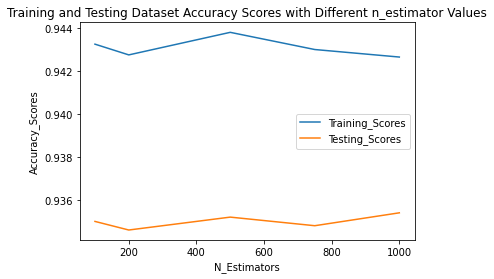

In [10]:
df = pd.DataFrame({'Training_Scores': training_scores,'Testing_Scores':  testing_scores}, index=n_estimators)

df.plot.line();
plt.xlabel("N_Estimators");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different n_estimator Values");

CPU times: user 341 ms, sys: 3.98 ms, total: 345 ms
Wall time: 346 ms


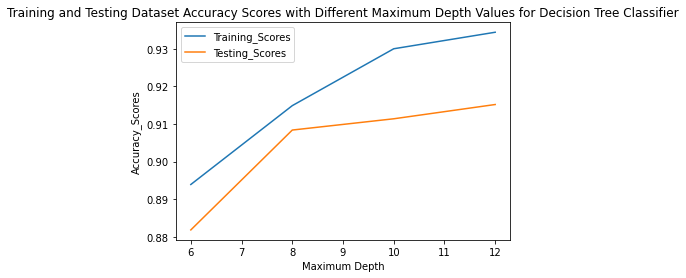

In [11]:
# Manual Hyerparameter Tuning using DecisionTreeClassifier
# Note that these results can be misleading as we are using just one tree, when you combine over multiple trees, the accuracy score is bound to come down.
# In other words, Decision Trees tend to overfit, in order to reduce that, ensemble models such as Bagging and Boosting methods are used.
%%time
maximum_depth = [6,8,10,12]
testing_scores_dc  = []
training_scores_dc = []

for value in maximum_depth:
    
    # Building the model with different values of maximum_depth 
    dc = DecisionTreeClassifier(max_depth=value,
                                max_features='sqrt',
                                min_samples_leaf=25,
                                min_samples_split=30,
                                random_state=42)
    
    # Fitting the model on training datasets
    dc.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions_dc = dc.predict(X_Train)
    testing_predictions_dc = dc.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score_dc = accuracy_score(y_Train,training_predictions_dc)
    testing_accuracy_score_dc  = accuracy_score(y_Test,testing_predictions_dc)
    
    # Appending these values to our original lists
    training_scores_dc.append(training_accuracy_score_dc)
    testing_scores_dc.append(testing_accuracy_score_dc)


df = pd.DataFrame({'Training_Scores': training_scores_dc,'Testing_Scores':  testing_scores_dc}, index=maximum_depth)

df.plot.line();
plt.xlabel("Maximum Depth");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different Maximum Depth Values for Decision Tree Classifier");

CPU times: user 2min 30s, sys: 180 ms, total: 2min 30s
Wall time: 2min 29s


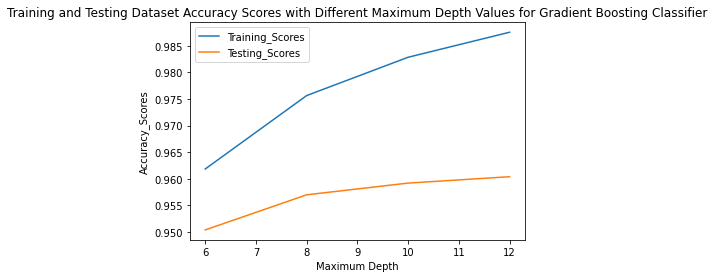

In [12]:
# Manual Hyerparameter Tuning using GradientBoostingClassifier
%%time
maximum_depth = [6,8,10,12]
testing_scores_gb  = []
training_scores_gb = []

for value in maximum_depth:
    
    # Building the model with different values of maximum_depth 
    gb = GradientBoostingClassifier(n_estimators=500,
                                    learning_rate=0.01,
                                    max_depth=value,
                                    max_features='sqrt',
                                    min_samples_leaf=25,
                                    min_samples_split=30,
                                    random_state=42)
    
    # Fitting the model on training datasets
    gb.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions_gb = gb.predict(X_Train)
    testing_predictions_gb = gb.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score_gb = accuracy_score(y_Train,training_predictions_gb)
    testing_accuracy_score_gb  = accuracy_score(y_Test,testing_predictions_gb)
    
    # Appending these values to our original lists
    training_scores_gb.append(training_accuracy_score_gb)
    testing_scores_gb.append(testing_accuracy_score_gb)


df = pd.DataFrame({'Training_Scores': training_scores_gb,'Testing_Scores':  testing_scores_gb}, index=maximum_depth)

df.plot.line();
plt.xlabel("Maximum Depth");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different Maximum Depth Values for Gradient Boosting Classifier");

CPU times: user 19.2 s, sys: 256 ms, total: 19.4 s
Wall time: 9.98 s


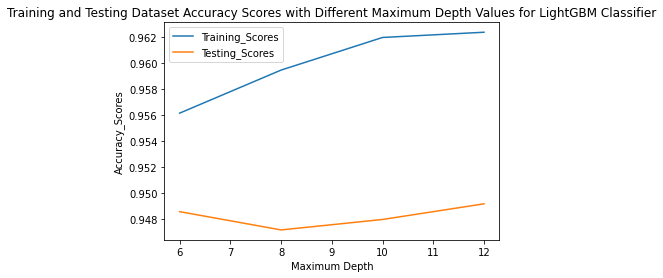

In [13]:
# Manual Hyerparameter Tuning using LightGBMClassifier
%%time
maximum_depth = [6,8,10,12]
testing_scores_lgb  = []
training_scores_lgb = []

for value in maximum_depth:
    
    # Building the model with different values of maximum_depth 
    lgbm = lgb.LGBMClassifier(n_estimators=500,
                             learning_rate=0.01,
                             max_depth=value,
                             max_features='sqrt',
                             min_samples_leaf=25,
                             min_samples_split=30,
                             random_state=42,
                             n_jobs=-1)
    
    # Fitting the model on training datasets
    lgbm.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions_lgb = lgbm.predict(X_Train)
    testing_predictions_lgb = lgbm.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score_lgb = accuracy_score(y_Train,training_predictions_lgb)
    testing_accuracy_score_lgb  = accuracy_score(y_Test,testing_predictions_lgb)
    
    # Appending these values to our original lists
    training_scores_lgb.append(training_accuracy_score_lgb)
    testing_scores_lgb.append(testing_accuracy_score_lgb)


df = pd.DataFrame({'Training_Scores': training_scores_lgb,'Testing_Scores':  testing_scores_lgb}, index=maximum_depth)

df.plot.line();
plt.xlabel("Maximum Depth");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different Maximum Depth Values for LightGBM Classifier");

CPU times: user 3min 24s, sys: 403 ms, total: 3min 25s
Wall time: 1min 44s


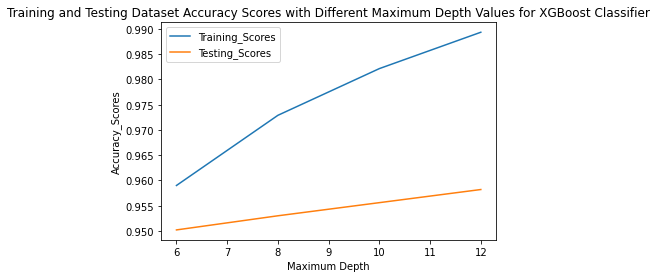

In [14]:
# Manual Hyerparameter Tuning using XGBoost Classifier
%%time
maximum_depth = [6,8,10,12]
testing_scores_xgb  = []
training_scores_xgb = []

for value in maximum_depth:
    
    # Building the model with different values of maximum_depth 
    xgbm = xgb.XGBClassifier(n_estimators=500,
                             learning_rate=0.01,
                             max_depth=value,
                             max_features='sqrt',
                             min_samples_leaf=25,
                             min_samples_split=30,
                             random_state=42,
                             n_jobs=-1)
    
    # Fitting the model on training datasets
    xgbm.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions_xgb = xgbm.predict(X_Train)
    testing_predictions_xgb = xgbm.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score_xgb = accuracy_score(y_Train,training_predictions_xgb)
    testing_accuracy_score_xgb  = accuracy_score(y_Test,testing_predictions_xgb)
    
    # Appending these values to our original lists
    training_scores_xgb.append(training_accuracy_score_xgb)
    testing_scores_xgb.append(testing_accuracy_score_xgb)


df = pd.DataFrame({'Training_Scores': training_scores_xgb,'Testing_Scores':  testing_scores_xgb}, index=maximum_depth)

df.plot.line();
plt.xlabel("Maximum Depth");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different Maximum Depth Values for XGBoost Classifier");

CPU times: user 17.1 s, sys: 214 ms, total: 17.3 s
Wall time: 12.3 s


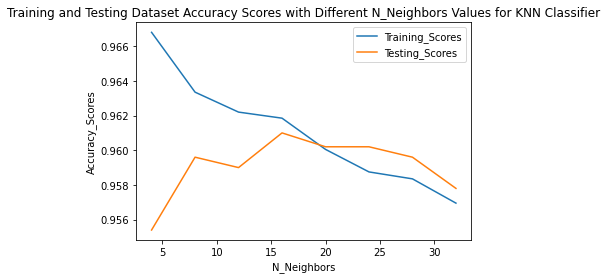

In [15]:
# Manual Hyerparameter Tuning using K Nearest Neighbors Classifier
%%time
neighbors = [4,8,12,16,20,24,28,32]
testing_scores_knn  = []
training_scores_knn = []

for value in neighbors:
    
    # Building the model with different values of n_neighbors 
    knn = KNeighborsClassifier(n_neighbors=value,
                               n_jobs=-1)
    
    # Fitting the model on training datasets
    knn.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions_knn = knn.predict(X_Train)
    testing_predictions_knn = knn.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score_knn = accuracy_score(y_Train,training_predictions_knn)
    testing_accuracy_score_knn  = accuracy_score(y_Test,testing_predictions_knn)
    
    # Appending these values to our original lists
    training_scores_knn.append(training_accuracy_score_knn)
    testing_scores_knn.append(testing_accuracy_score_knn)


df = pd.DataFrame({'Training_Scores': training_scores_knn,'Testing_Scores':  testing_scores_knn}, index=neighbors)

df.plot.line();
plt.xlabel("N_Neighbors");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different N_Neighbors Values for KNN Classifier");

CPU times: user 215 ms, sys: 601 ms, total: 816 ms
Wall time: 2.26 s


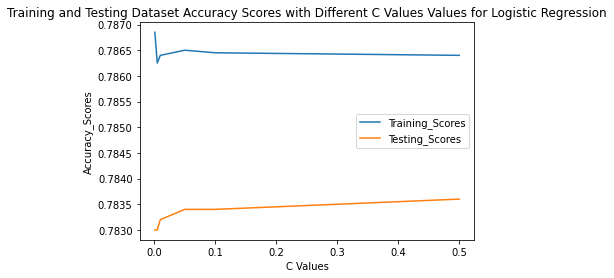

In [16]:
# Manual Hyerparameter Tuning using Logistic Regression
%%time
c_values = [.001,.005,.01,.05,.1,.5]
testing_scores_lr  = []
training_scores_lr = []

for value in c_values:
    
    # Building the model with different c values 
    lr = LogisticRegression(C=value,
                            n_jobs=-1,)
    
    # Fitting the model on training datasets
    lr.fit(X_Train,y_Train)

    # predicting on training and testing datasets
    training_predictions_lr = lr.predict(X_Train)
    testing_predictions_lr = lr.predict(X_Test)

    # checking the accuracy score on training and testing datasets
    training_accuracy_score_lr = accuracy_score(y_Train,training_predictions_lr)
    testing_accuracy_score_lr  = accuracy_score(y_Test,testing_predictions_lr)
    
    # Appending these values to our original lists
    training_scores_lr.append(training_accuracy_score_lr)
    testing_scores_lr.append(testing_accuracy_score_lr)


df = pd.DataFrame({'Training_Scores': training_scores_lr,'Testing_Scores':  testing_scores_lr}, index=c_values)

df.plot.line();
plt.xlabel("C Values");
plt.ylabel('Accuracy_Scores');
plt.title("Training and Testing Dataset Accuracy Scores with Different C Values Values for Logistic Regression");

We can see from Manual Hyperparameter Tuning of the other ML models that Logistic Regression gave us the least accuracy, LightGBM and XGBoost gave almost the same accuracy. K Nearest Neighbors classifier almost gave the same accuract as the Boosting models which is surprising. The reason Logistic Regression gave us such low score is because there are lot of assumptions involved while building an LR model, and if they are not met, the model does not perorm well.





### Hyperparameter Tuning with Random Search

Now we shall see how to tune the Hyperparameters of the Random Forest model using the RandomizedsearchCV library from scikit-learn. 

There are a few things to note about RandomizedsearchCV implementation from scikit-learn,

1. We need to pass the parameters in the form of distribution or grid-like with key-value pairs, like in a dictionary.
2. It performs cross-validation, so that overfitting does not happen.
3. For classification problems, by default, StratifiedKFold cross-validation is performed and for Regression problems, KFold cross-validation is performed. This is helpful in case the dependent variable is imbalanced.
4. It also has methods like predict_proba in case you want to predict probabilities, best_score_ to know the best score obtained, best_params_ to get the best parameters that the model has learned, etc. 
5. You can also define the number of combinations of parameter settings, it is defined by n_iter.
6. You can also define the scoring parameter of your choice. 

The function defined below, will be used to execute the Random Search using different machine learning models. It will take parameter distribution as the argument and return the best scores, params and estimators. The functions can also be used to run Random search on different ML models. 

In [17]:
def randomsearch(**param_distribution):

  # defining the model
  if param_distribution['model_name'] == "rf":
    model = RandomForestClassifier()
  elif param_distribution['model_name'] == "dt":
    model = DecisionTreeClassifier()
  elif param_distribution['model_name'] == "lgb":
    model = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary')
  elif param_distribution['model_name'] == "xgb":
    model = xgb.XGBClassifier(booster='gbtree',objective="binary:logistic")
  elif param_distribution['model_name'] == "knn":
    model = KNeighborsClassifier()
  elif param_distribution['model_name'] == "lr":
    model = LogisticRegression()
  elif param_distribution['model_name'] == "nb":
    model = GaussianNB()
  elif param_distribution['model_name'] == "gb":
    model = GradientBoostingClassifier()

  # drop the model name from params
  del param_distribution['model_name']

  
  # defining the search
  random_search = RandomizedSearchCV(estimator=model,
                                     param_distributions=param_distribution,
                                     n_iter=10,
                                     scoring='accuracy',
                                     cv = 5,
                                     n_jobs=-1,
                                     random_state=42)
  
  # fitting the randomizedsearchcv
  random_search.fit(X,y)

  # fetching the best score, params, estimator
  print (random_search.best_score_)
  print ("----------------")

  print (random_search.best_params_)
  print ("----------------")

  print (random_search.best_estimator_)


In [18]:
# Hyperparameter tuning using Randomizedsearchcv - Decision Tree Classifier.
param_distribution = {"max_depth":list(range(4,11,2)),
                      "max_features":['sqrt','log2',0.5],
                      "min_samples_leaf":list(range(5,16,5)),
                      "min_samples_split":list(range(15,30,5)),
                      "model_name":"dt"}

%time randomsearch(**param_distribution)

0.91896
----------------
{'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}
----------------
DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=25)
CPU times: user 274 ms, sys: 27 ms, total: 301 ms
Wall time: 2.88 s


In [19]:
# Hyperparameter tuning using Randomizedsearchcv - Random Forest Classifier.
param_distribution = {"n_estimators":list(range(200,700,200)),
                      "max_depth":list(range(4,11,2)),
                      "max_features":['sqrt','log2',0.5],
                      "min_samples_leaf":list(range(5,16,5)),
                      "min_samples_split":list(range(15,30,5)),
                      "model_name":"rf"}

%time randomsearch(**param_distribution)

0.945
----------------
{'n_estimators': 600, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 10}
----------------
RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=15,
                       min_samples_split=20, n_estimators=600)
CPU times: user 41.7 s, sys: 430 ms, total: 42.1 s
Wall time: 9min 17s


In [20]:
# Hyperparameter tuning using Randomizedsearchcv - Gradient Boosting Classifier.
param_distribution = {"learning_rate":[0.001,0.003,0.005],
                      "n_estimators":list(range(200,700,200)),
                      "max_depth":list(range(4,11,2)),
                      "subsample":[0.9,0.8],
                      "min_samples_leaf":list(range(5,16,5)),
                      "min_samples_split":list(range(15,30,5)),
                      "max_features":[0.5,'sqrt','log2'],
                      "model_name":"gb"}

%time randomsearch(**param_distribution)

0.95472
----------------
{'subsample': 0.9, 'n_estimators': 600, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 10, 'learning_rate': 0.003}
----------------
GradientBoostingClassifier(learning_rate=0.003, max_depth=10,
                           max_features='log2', min_samples_leaf=15,
                           min_samples_split=25, n_estimators=600,
                           subsample=0.9)
CPU times: user 1min 4s, sys: 674 ms, total: 1min 5s
Wall time: 16min 20s


In [21]:
# Hyperparameter tuning using Randomizedsearchcv - LightGBM Classifier.
param_distribution = {"learning_rate":[0.001,0.003,0.005,0.01],
                      "n_estimators":list(range(200,2000,200)),
                      "max_depth":list(range(4,11,2)),
                      "subsample":[0.9,0.8],
                      "colsample_bytree":[0.9,0.8,0.7],
                      "model_name":"lgb",
                      "min_child_samples":[5,7,10,15,25],
                      "reg_alpha":[0.5,1,2],
                      "reg_lambda":[0.5,1,2]}

%time randomsearch(**param_distribution)

0.9573600000000001
----------------
{'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 2, 'n_estimators': 1000, 'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
----------------
LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
               min_child_samples=5, n_estimators=1000, objective='binary',
               reg_alpha=2, reg_lambda=2, subsample=0.9)
CPU times: user 8.59 s, sys: 246 ms, total: 8.83 s
Wall time: 3min 4s


In [22]:
# Hyperparameter tuning using Randomizedsearchcv - XGBoost Classifier.
param_distribution = {"learning_rate":[0.001,0.003,0.005],
                      "n_estimators":list(range(200,1000,200)),
                      "max_depth":list(range(4,11,2)),
                      "subsample":[0.9,0.8],
                      "colsample_bytree":[0.9,0.8,0.7],
                      "model_name":"xgb",
                      "min_child_samples":[5,7,10,15],
                      "reg_alpha":[0.5,1,2],
                      "reg_lambda":[0.5,1,2]}

%time randomsearch(**param_distribution)

0.95164
----------------
{'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 600, 'min_child_samples': 15, 'max_depth': 10, 'learning_rate': 0.003, 'colsample_bytree': 0.8}
----------------
XGBClassifier(colsample_bytree=0.8, learning_rate=0.003, max_depth=10,
              min_child_samples=15, n_estimators=600, reg_alpha=1, reg_lambda=2,
              subsample=0.9)
CPU times: user 46.6 s, sys: 560 ms, total: 47.1 s
Wall time: 15min 33s


In [23]:
# Hyperparameter tuning using Randomizedsearchcv - KNN Classifier.
param_distribution = {"n_neighbors":[2,5,7,10,15,20,25,30],
                      "model_name":"knn",
                      "weights":['uniform','distance']}

%time randomsearch(**param_distribution)

0.9594799999999999
----------------
{'weights': 'distance', 'n_neighbors': 15}
----------------
KNeighborsClassifier(n_neighbors=15, weights='distance')
CPU times: user 301 ms, sys: 25.1 ms, total: 326 ms
Wall time: 10.6 s


In [24]:
# Hyperparameter tuning using Randomizedsearchcv - Logistic Regression.
param_distribution = {"C":[0.001,0.005,0.1,0.05,0.1,0.5],
                      "model_name":"lr"}

%time randomsearch(**param_distribution)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


0.78616
----------------
{'C': 0.005}
----------------
LogisticRegression(C=0.005)
CPU times: user 202 ms, sys: 61.8 ms, total: 264 ms
Wall time: 1.32 s


We can see above that K Nearest Neighbors classifier performed better than sophisticated algorithms such as XGBoost, LightGBM classifiers. We can also see that KNN clasifier took the least amount of time and XGBoost took most time. Random Searchis used when we have large set of hyperparameters to search from. 

### Hyperparameter Tuning With Grid Search

Now we shall see how to tune the Hyperparameters of the Random Forest model using GridsearchCV library from scikit-learn. 

There are a few things to note about GridsearchCV implementation from scikit-learn,

1. We need to pass the parameters in the form of distribution or grid-like with key-value pairs, like in a dictionary.
2. It performs cross-validation so that overfitting does not happen.
3. For classification problems, by default, StratifiedKFold cross-validation is performed and for Regression problems, KFold cross-validation is performed. This is helpful in case the dependent variable is imbalanced.
4. It also has methods like predict_proba in case you want to predict probabilities, best_score_ to know the best score obtained, best_params_ to get the best parameters that the model has learned, etc. 
5. You can also define the scoring parameter of your choice. 

Few differences between RandomizedsearchCV and GridsearchCV implementations are,
1. In RandomizedsearchCV, not all combinations of hyperparameters are searched (this is defined by n_iter), but in GridsearchCV, all possible combinations are searched.
2. GridsearchCV takes a significantly longer time than RandomizedsearchCV because of a large number of combinations.

We will use the same function that we used for Random Search, we will replace RandomizedsearchCV with Gridsearchcv. Everything else remains the same. We will also not use too many hyperparameter sets here in Grid Search as it will take a lot of time to execute. 

In [25]:
def gridsearch(**param_grid):

  # defining the model
  if param_grid['model_name'] == "rf":
    model = RandomForestClassifier(min_samples_leaf=15,min_samples_split=20,n_jobs=-1,n_estimators=600)
  elif param_grid['model_name'] == "dt":
    model = DecisionTreeClassifier(random_state=42)
  elif param_grid['model_name'] == "lgb":
    model = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',subsample=0.9,min_child_samples=5,max_depth=10,n_jobs=-1,colsample_bytree=0.7,n_estimators=1000)
  elif param_grid['model_name'] == "xgb":
    model = xgb.XGBClassifier(booster='gbtree',objective="binary:logistic",subsample=0.9,min_child_samples=15,max_depth=10,n_jobs=-1,colsample_bytree=0.8,n_estimators=600,reg_alpha=1,reg_lambda=2)
  elif param_grid['model_name'] == "knn":
    model = KNeighborsClassifier(weights='distance')
  elif param_grid['model_name'] == "lr":
    model = LogisticRegression()
  elif param_grid['model_name'] == "nb":
    model = GaussianNB()
  elif param_grid['model_name'] == "gb":
    model = GradientBoostingClassifier(min_samples_leaf=15,min_samples_split=15,subsample=0.8,n_estimators=600,learning_rate=0.003)

  # drop the model name from params
  del param_grid['model_name']

  
  # defining the search
  grid_search = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv = 5,
                        n_jobs=-1)
  
  # fitting the GridsearchCV
  grid_search.fit(X,y)

  # fetching the best score, params, estimator
  print (grid_search.best_score_)
  print ("----------------")

  print (grid_search.best_params_)
  print ("----------------")

  print (grid_search.best_estimator_)

In [26]:
# Hyperparameter tuning using GridsearchCV - Decision Tree Classifier.
param_grid = {"max_depth":list(range(4,11,2)),
              "max_features":['sqrt','log2',0.5],
              "min_samples_leaf":list(range(5,16,5)),
              "min_samples_split":list(range(15,30,5)),
              "model_name":"dt"}

%time gridsearch(**param_grid)

0.931
----------------
{'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 20}
----------------
DecisionTreeClassifier(max_depth=10, max_features=0.5, min_samples_leaf=5,
                       min_samples_split=20, random_state=42)
CPU times: user 1.45 s, sys: 95.2 ms, total: 1.55 s
Wall time: 30 s


In [27]:
# Hyperparameter tuning using GridsearchCV - Random Forest Classifier.
param_grid = {"max_depth":[6,8,10],
              "max_features":['sqrt','log2',0.5],
              "model_name":"rf"}

%time gridsearch(**param_grid)

0.94536
----------------
{'max_depth': 10, 'max_features': 0.5}
----------------
RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=15,
                       min_samples_split=20, n_estimators=600, n_jobs=-1)
CPU times: user 1min 31s, sys: 757 ms, total: 1min 32s
Wall time: 18min 13s


In [28]:
# Hyperparameter tuning using GridsearchCV - Gradient Boosting Classifier.
param_grid = {"max_depth":list(range(4,11,2)),
              "model_name":"gb"}

%time gridsearch(**param_grid)

0.95048
----------------
{'max_depth': 10}
----------------
GradientBoostingClassifier(learning_rate=0.003, max_depth=10,
                           min_samples_leaf=15, min_samples_split=15,
                           n_estimators=600, subsample=0.8)
CPU times: user 2min 34s, sys: 878 ms, total: 2min 35s
Wall time: 23min 40s


In [29]:
# Hyperparameter tuning using GridsearchCV - LightGBM Classifier.
param_grid = {"learning_rate":[0.001,0.003,0.005,0.01],
              "model_name":"lgb",
              "reg_alpha":[0.5,1,2],
              "reg_lambda":[0.5,1,2]}

%time gridsearch(**param_grid)

0.9582
----------------
{'learning_rate': 0.01, 'reg_alpha': 2, 'reg_lambda': 0.5}
----------------
LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
               min_child_samples=5, n_estimators=1000, objective='binary',
               reg_alpha=2, reg_lambda=0.5, subsample=0.9)
CPU times: user 8.49 s, sys: 486 ms, total: 8.98 s
Wall time: 10min 34s


In [30]:
# Hyperparameter tuning using GridsearchCV - XGBoost Classifier.
param_grid = {"learning_rate":[0.001,0.003,0.005],
              "model_name":"xgb"}

%time gridsearch(**param_grid)

0.9547599999999999
----------------
{'learning_rate': 0.005}
----------------
XGBClassifier(colsample_bytree=0.8, learning_rate=0.005, max_depth=10,
              min_child_samples=15, n_estimators=600, n_jobs=-1, reg_alpha=1,
              reg_lambda=2, subsample=0.9)
CPU times: user 44.9 s, sys: 309 ms, total: 45.2 s
Wall time: 7min 39s


In [31]:
# Hyperparameter tuning using GridsearchCV - KNN Classifier.
param_grid = {"n_neighbors":[2,5,7,10,15,20,25,30],
              "model_name":"knn"}

%time gridsearch(**param_grid)

0.96004
----------------
{'n_neighbors': 10}
----------------
KNeighborsClassifier(n_neighbors=10, weights='distance')
CPU times: user 244 ms, sys: 15.1 ms, total: 259 ms
Wall time: 6.95 s


In [32]:
# Hyperparameter tuning using GridsearchCV - Logistic Regression.
param_grid = {"C":[0.001,0.005,0.1,0.05,0.1,0.5],
              "model_name":"lr"}

%time gridsearch(**param_grid)

0.78616
----------------
{'C': 0.005}
----------------
LogisticRegression(C=0.005)
CPU times: user 192 ms, sys: 60.2 ms, total: 252 ms
Wall time: 1.33 s


We can see from the results of the Grid search that, almost all of the ML models took significant time to execute. That is because grid search is time consuming. We could also see that Grid search with Gradient Boosting classifier took maximum time and KNN classifier took minimum time and KNN classifier produced the best results. The only conclusion that can be drawn is that Grid search is time consuming and it should be used when you have narrowed down your list of hyperparameters to a few values. 

We can note from the output above that it took more than 17 mins to run the grid search using Random Forest Classifier, even though the number of hyperparameters to search was less than that of Random Search. This is because, in Grid Search, every possible combination is checked. For example, in the above code, there are 12 combinations checked. 4 from n_estimators and 3 from max_depth. This combined with the large size of the dataset and 5 fold cross-validation, will take a significantly long time. 

Usually, Random Search is used in the beginning to narrow down the parameters to a few values, and then to further fine-tune, grid search is used. 

Similar to RandomizedsearchCV, in Grid search as well, we can see the best score, best estimator, best parameters, etc.

### Hyperparameter Tuning With Hyperopt

Hyperopt is an advanced hyperparameter tuning library that uses Bayesian Optimization for tuning, it was created by James Bergstra. The main advantage of this library is that it can be used with large datasets and with large set of Hyperparameters to tune. Hyperopt has following components that form its core, 

1. Objective Function.
2. fmin function.
3. search space.

Objective function basically defines the lss function that you want to minimize. For examples, it can be log loss etc. 

Search space basically defines the hyperparameters that you want to tune and the range of values they take. It is not defined in the form of a distribution or a grid like we saw in GridsearchCV or RandomizedsearchCV. 

fmin function is basically the function that takes in the search space, objective function and uses different types of search methods to search for best set of hyperparameters. Random Search, TPE (Tree Parzen Estimator) are some of the commonly used search methods. It also takes in the maximum number of evaluations that you want to perform. 

It also has a Trials object that is used to store the parameters, loss functions etc in order to evaluate in the future. We will now see how to implement Hyperparameter Optimization using Hyperopt library.

Note that in the code to define search space below, there are different methods to deine search spaces, if you want to choose from a few values, you need to define it as hp.choice, if you want the values within a range and if you want them to be discrete , it should be defined as hp.quniform. There are many such methods of defining search space. 

Link to know more about defining search spaces: https://github.com/hyperopt/hyperopt/wiki/FMin#21-parameter-expressions

We will define a function similar to the function used for Grid search and Random search, it will decide which ML algorithm to run based on the input. 

In [33]:
def hyperopt_tuning(params):

    # defining the model
    if DEFAULT_PARAMS['model_name'] == "rf":
      model = RandomForestClassifier(n_jobs=-1,n_estimators=600)
    elif DEFAULT_PARAMS['model_name'] == "dt":
      model = DecisionTreeClassifier()
    elif DEFAULT_PARAMS['model_name'] == "lgb":
      model = lgb.LGBMClassifier(boosting_type="gbdt",objective="binary",n_jobs=-1)
    elif DEFAULT_PARAMS['model_name'] == "xgb":
      model = xgb.XGBClassifier(booster='gbtree',objective="binary:logistic",n_jobs=-1)
    elif DEFAULT_PARAMS['model_name'] == "knn":
      model = KNeighborsClassifier(n_jobs=-1)
    elif DEFAULT_PARAMS['model_name'] == "lr":
      model = LogisticRegression()
    elif DEFAULT_PARAMS['model_name'] == "nb":
      model = GaussianNB()
    elif DEFAULT_PARAMS['model_name'] == "gb":
      model = GradientBoostingClassifier(n_estimators=600,learning_rate=0.001,max_depth=8)

    # drop the model name from params
    # del DEFAULT_PARAMS['model_name']

    all_params = {**params,**DEFAULT_PARAMS}
    
    # Note: Instead of running the cross_val_score, you can manually split the data using stratifiedkfold or just kfold
    accuracy_score = cross_val_score(model, X, y,cv=5,scoring="accuracy").mean()
    return {"loss": -accuracy_score, "status": STATUS_OK}

In [34]:
# Hyperopt With Decision Tree Classifier 

# Defining the search space
search_space = {"max_depth": hp.choice("max_depth", [4,6,8,10]),
                "max_features": hp.choice("max_features", [0.5,'sqrt','log2']),
                "min_samples_leaf":hp.choice("min_samples_leaf", [3,5,7,10,25]),
                "min_samples_split":hp.choice("min_samples_split", [10,20,30,40])}

DEFAULT_PARAMS = {"model_name":"dt"}


# Initializing trials
trials = Trials()

optimized = fmin(fn=hyperopt_tuning,
                 space = search_space,  # using the search space defined above
                 algo=tpe.suggest,  # search algorithm to use
                 max_evals=10, # performs 10 evaluations
                 trials=trials)

print("Best Parameters: {}".format(optimized))
print ("------------------------------------")
# Checking all scores using trials
print (trials.losses())
print ("------------------------------------")
# Checking the best trial (trial with best accuracy)
print (trials.best_trial)
print ("------------------------------------")
# checking the results.
trials.results

100%|██████████| 10/10 [00:19<00:00,  1.91s/it, best loss: -0.9309999999999998]
Best Parameters: {'max_depth': 0, 'max_features': 2, 'min_samples_leaf': 0, 'min_samples_split': 0}
------------------------------------
[-0.92904, -0.93028, -0.93072, -0.93056, -0.9299199999999999, -0.9300799999999999, -0.9295200000000001, -0.9309999999999998, -0.9306800000000001, -0.92972]
------------------------------------
{'state': 2, 'tid': 7, 'spec': None, 'result': {'loss': -0.9309999999999998, 'status': 'ok'}, 'misc': {'tid': 7, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [7], 'max_features': [7], 'min_samples_leaf': [7], 'min_samples_split': [7]}, 'vals': {'max_depth': [0], 'max_features': [2], 'min_samples_leaf': [0], 'min_samples_split': [0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 3, 5, 13, 17, 45, 225000), 'refresh_time': datetime.datetime(2022, 3, 5, 13, 17, 47, 120000)}
---------------------------------

[{'loss': -0.92904, 'status': 'ok'},
 {'loss': -0.93028, 'status': 'ok'},
 {'loss': -0.93072, 'status': 'ok'},
 {'loss': -0.93056, 'status': 'ok'},
 {'loss': -0.9299199999999999, 'status': 'ok'},
 {'loss': -0.9300799999999999, 'status': 'ok'},
 {'loss': -0.9295200000000001, 'status': 'ok'},
 {'loss': -0.9309999999999998, 'status': 'ok'},
 {'loss': -0.9306800000000001, 'status': 'ok'},
 {'loss': -0.92972, 'status': 'ok'}]

In [35]:
# Hyperopt With Random Forest Classifier

# Defining the search space
search_space = {"max_depth": hp.choice("max_depth", [4,6,8,10]),
                "max_features": hp.choice("max_features", [0.5,'sqrt','log2']),
                "min_samples_leaf":hp.choice("min_samples_leaf", [3,5,7,10,25]),
                "min_samples_split":hp.choice("min_samples_split", [10,20,30,40])}

DEFAULT_PARAMS = {"model_name":"rf"}


# Initializing trials
trials = Trials()

optimized = fmin(fn=hyperopt_tuning,
                 space = search_space,  # using the search space defined above
                 algo=tpe.suggest,  # search algorithm to use
                 max_evals=10, # performs 10 evaluations
                 trials=trials)

print("Best Parameters: {}".format(optimized))
print ("------------------------------------")
# Checking all scores using trials
print (trials.losses())
print ("------------------------------------")
# Checking the best trial (trial with best accuracy)
print (trials.best_trial)
print ("------------------------------------")
# checking the results.
trials.results

100%|██████████| 10/10 [25:28<00:00, 152.85s/it, best loss: -0.9616]
Best Parameters: {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 1}
------------------------------------
[-0.9610799999999999, -0.9612400000000001, -0.9610799999999999, -0.96096, -0.9609200000000001, -0.9615199999999999, -0.9615199999999999, -0.96144, -0.96144, -0.9616]
------------------------------------
{'state': 2, 'tid': 9, 'spec': None, 'result': {'loss': -0.9616, 'status': 'ok'}, 'misc': {'tid': 9, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [9], 'max_features': [9], 'min_samples_leaf': [9], 'min_samples_split': [9]}, 'vals': {'max_depth': [1], 'max_features': [2], 'min_samples_leaf': [3], 'min_samples_split': [1]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 3, 5, 13, 40, 47, 124000), 'refresh_time': datetime.datetime(2022, 3, 5, 13, 43, 19, 524000)}
------------------------------------


[{'loss': -0.9610799999999999, 'status': 'ok'},
 {'loss': -0.9612400000000001, 'status': 'ok'},
 {'loss': -0.9610799999999999, 'status': 'ok'},
 {'loss': -0.96096, 'status': 'ok'},
 {'loss': -0.9609200000000001, 'status': 'ok'},
 {'loss': -0.9615199999999999, 'status': 'ok'},
 {'loss': -0.9615199999999999, 'status': 'ok'},
 {'loss': -0.96144, 'status': 'ok'},
 {'loss': -0.96144, 'status': 'ok'},
 {'loss': -0.9616, 'status': 'ok'}]

In [36]:
# Hyperopt With Gradient Boosting Classifier

# Defining the search space
search_space = {"max_features": hp.choice("max_features", [0.5,'sqrt','log2']),
                "min_samples_leaf":hp.choice("min_samples_leaf", [3,5,7,10,25]),
                "min_samples_split":hp.choice("min_samples_split", [10,20,30,40]),
                "subsample":hp.choice("subsample",[0.7,0.8,0.9])}

DEFAULT_PARAMS = {"model_name":"gb"}


# Initializing trials
trials = Trials()

optimized = fmin(fn=hyperopt_tuning,
                 space = search_space,  # using the search space defined above
                 algo=tpe.suggest,  # search algorithm to use
                 max_evals=10, # performs 10 evaluations
                 trials=trials)

print("Best Parameters: {}".format(optimized))
print ("------------------------------------")
# Checking all scores using trials
print (trials.losses())
print ("------------------------------------")
# Checking the best trial (trial with best accuracy)
print (trials.best_trial)
print ("------------------------------------")
# checking the results.
trials.results

100%|██████████| 10/10 [1:41:30<00:00, 609.07s/it, best loss: -0.9326000000000001]
Best Parameters: {'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'subsample': 0}
------------------------------------
[-0.93248, -0.93256, -0.93256, -0.9326000000000001, -0.93256, -0.93244, -0.93256, -0.93248, -0.93252, -0.93256]
------------------------------------
{'state': 2, 'tid': 3, 'spec': None, 'result': {'loss': -0.9326000000000001, 'status': 'ok'}, 'misc': {'tid': 3, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_features': [3], 'min_samples_leaf': [3], 'min_samples_split': [3], 'subsample': [3]}, 'vals': {'max_features': [1], 'min_samples_leaf': [1], 'min_samples_split': [2], 'subsample': [0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 3, 5, 14, 13, 52, 466000), 'refresh_time': datetime.datetime(2022, 3, 5, 14, 24, 0, 638000)}
------------------------------------


[{'loss': -0.93248, 'status': 'ok'},
 {'loss': -0.93256, 'status': 'ok'},
 {'loss': -0.93256, 'status': 'ok'},
 {'loss': -0.9326000000000001, 'status': 'ok'},
 {'loss': -0.93256, 'status': 'ok'},
 {'loss': -0.93244, 'status': 'ok'},
 {'loss': -0.93256, 'status': 'ok'},
 {'loss': -0.93248, 'status': 'ok'},
 {'loss': -0.93252, 'status': 'ok'},
 {'loss': -0.93256, 'status': 'ok'}]

In [37]:
# Hyperopt With Light GBM Classifier

# Defining the search space
search_space = {"n_estimators": hp.choice("n_estimators", [200,400,600,800,1000,1200]),
                "max_depth": hp.choice("max_depth", [4,6,8,10]),
                "colsample_bytree": hp.choice("colsample_bytree", [0.7,0.8,0.9]),
                "min_child_samples":hp.choice("min_child_samples", [3,5,7,10,25]),
                "subsample":hp.choice("subsample",[.75,.8,.9]),
                "reg_alpha":hp.choice("reg_alpa",[0.5,1,2,5,10]),
                "reg_lambda":hp.choice("reg_lambda",[0.5,1,2,5,10])}

DEFAULT_PARAMS = {"model_name":"lgb"}


# Initializing trials
trials = Trials()

optimized = fmin(fn=hyperopt_tuning,
                 space = search_space,  # using the search space defined above
                 algo=tpe.suggest,  # search algorithm to use
                 max_evals=10, # performs 10 evaluations
                 trials=trials)

print("Best Parameters: {}".format(optimized))
print ("------------------------------------")
# Checking all scores using trials
print (trials.losses())
print ("------------------------------------")
# Checking the best trial (trial with best accuracy)
print (trials.best_trial)
print ("------------------------------------")
# checking the results.
trials.results

100%|██████████| 10/10 [00:26<00:00,  2.68s/it, best loss: -0.9580400000000001]
Best Parameters: {'colsample_bytree': 1, 'max_depth': 3, 'min_child_samples': 4, 'n_estimators': 0, 'reg_alpa': 0, 'reg_lambda': 2, 'subsample': 2}
------------------------------------
[-0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001, -0.9580400000000001]
------------------------------------
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.9580400000000001, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'colsample_bytree': [0], 'max_depth': [0], 'min_child_samples': [0], 'n_estimators': [0], 'reg_alpa': [0], 'reg_lambda': [0], 'subsample': [0]}, 'vals': {'colsample_bytree': [1], 'max_depth': [3], 'min_child_samples': [4], 'n_estimators': [0], 'reg_alpa': [0], 'reg_lambda': [2], 'subsample': [2]}},

[{'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'},
 {'loss': -0.9580400000000001, 'status': 'ok'}]

In [38]:
# Hyperopt With XGBoost Classifier

# Defining the search space
search_space = {"n_estimators": hp.choice("n_estimators", [200,400,600,800,1000]),
                "max_depth": hp.choice("max_depth", [4,6,8,10]),
                "colsample_bytree": hp.choice("colsample_bytree", [0.7,0.8,0.9]),
                "min_child_samples":hp.choice("min_child_samples", [3,5,7,10,25]),
                "subsample":hp.choice("subsample",[.75,.8,.9]),
                "reg_alpha":hp.choice("reg_alpha",[0.5,1,2]),
                "reg_lambda":hp.choice("reg_lambda",[0.5,1,2])}

DEFAULT_PARAMS = {"model_name":"xgb"}


# Initializing trials
trials = Trials()

optimized = fmin(fn=hyperopt_tuning,
                 space = search_space,  # using the search space defined above
                 algo=tpe.suggest,  # search algorithm to use
                 max_evals=10, # performs 10 evaluations
                 trials=trials)

print("Best Parameters: {}".format(optimized))
print ("------------------------------------")
# Checking all scores using trials
print (trials.losses())
print ("------------------------------------")
# Checking the best trial (trial with best accuracy)
print (trials.best_trial)
print ("------------------------------------")
# checking the results.
trials.results

100%|██████████| 10/10 [01:29<00:00,  8.91s/it, best loss: -0.9302400000000001]
Best Parameters: {'colsample_bytree': 0, 'max_depth': 3, 'min_child_samples': 0, 'n_estimators': 3, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 2}
------------------------------------
[-0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001, -0.9302400000000001]
------------------------------------
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.9302400000000001, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'colsample_bytree': [0], 'max_depth': [0], 'min_child_samples': [0], 'n_estimators': [0], 'reg_alpha': [0], 'reg_lambda': [0], 'subsample': [0]}, 'vals': {'colsample_bytree': [0], 'max_depth': [3], 'min_child_samples': [0], 'n_estimators': [3], 'reg_alpha': [1], 'reg_lambda': [0], 'subsample': [2]

[{'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'},
 {'loss': -0.9302400000000001, 'status': 'ok'}]

In [39]:
# Hyperopt With K Nearest Neighbors Classifier

# Defining the search space
search_space = {"n_neighbors": hp.choice("n_neighbors", [5,10,15,20,25,50]),
                "weights": hp.choice("weights", ['uniform','distance'])}

DEFAULT_PARAMS = {"model_name":"knn"}


# Initializing trials
trials = Trials()

optimized = fmin(fn=hyperopt_tuning,
                 space = search_space,  # using the search space defined above
                 algo=tpe.suggest,  # search algorithm to use
                 max_evals=10, # performs 10 evaluations
                 trials=trials)

print("Best Parameters: {}".format(optimized))
print ("------------------------------------")
# Checking all scores using trials
print (trials.losses())
print ("------------------------------------")
# Checking the best trial (trial with best accuracy)
print (trials.best_trial)
print ("------------------------------------")
# checking the results.
trials.results

100%|██████████| 10/10 [00:19<00:00,  1.97s/it, best loss: -0.9589599999999999]
Best Parameters: {'n_neighbors': 3, 'weights': 1}
------------------------------------
[-0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999, -0.9589599999999999]
------------------------------------
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.9589599999999999, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'n_neighbors': [0], 'weights': [0]}, 'vals': {'n_neighbors': [3], 'weights': [1]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 3, 5, 15, 26, 46, 310000), 'refresh_time': datetime.datetime(2022, 3, 5, 15, 26, 49, 96000)}
------------------------------------


[{'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'},
 {'loss': -0.9589599999999999, 'status': 'ok'}]

We can note a few things from the output of the Hyperopt search,

1. The results are 0 encoded. That is, in the Random Forest classifier output, maximum depth of 2 means, it is the value at index 2 (with 0 indexing) from the list we have passed. Similar interpretations apply to other hyperparameter values as well. It should be noted that all are 0 indexed. 
2. It does not always perform better than Grid search or Random Search.
3. It is complicated to code as compared to Grid search or Random search. 
4. n terms of time taken to run, it take slightly more time than Random Search and less than Grid search. 

Finally, it cannot be decided that one method of hyperparameter tuning is the best method, trial and error method should be followed and the best method should be decided. One thing to note is that if you pass many hyperparameters to search, no matter what search method you use, all of them will take significant time to run. So the method and hyperparameter values should be searched wisely.